In [28]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Métodos de evaluación

Por ahora hemos visto que:

- Se necesita separar de forma aleatoria en datos de entrenamiento y testeo para poder evaluar performance del algoritmo
- Existen diversas métricas para evaluar rendimiento, y elegimos la nuestra según las caracteristicas de nuestro problema
- Es útil apoyar la evaluación con visualizaciones de errores, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

### Controlar la aleatoridad en train_test_split

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro random_state.

In [29]:
X = pd.read_csv('./documents/X_opening.csv')
Y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [31]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [32]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, random_state=1)

In [33]:
pd.DataFrame.equals(X_train, X2_train)

True

### Cross validation

![](./documents/crossval.png)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(), X, Y, cv=5, scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [35]:
scores.mean()

0.4496402174579182

In [36]:
Lasso().fit(X_train, Y_train).score(X_test, Y_test)

0.7926190294963359

## Selección de modelos

### Overfitting o underfitting?

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

In [37]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(), X, Y, return_train_score=True, cv=5)
results

{'fit_time': array([0.00399947, 0.00401258, 0.01197815, 0.00401425, 0.01300907]),
 'score_time': array([0.00099921, 0.0009861 , 0.00199723, 0.00100017, 0.        ]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [38]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.4496402174579182


Tenemos bias por lo que buscaremos modelos más complejos.

### Validation curves y learning curves

In [39]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), X, Y, cv=5)

{'fit_time': array([0.00399923, 0.62793756, 0.00199938, 0.00199962, 0.0019989 ]),
 'score_time': array([0.00399995, 0.0040164 , 0.00299859, 0.00299931, 0.00300002]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [40]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, Y, cv=5)

{'fit_time': array([0.00501609, 0.00499916, 0.00199938, 0.00199914, 0.00199866]),
 'score_time': array([0.00498056, 0.00499749, 0.00499845, 0.00401258, 0.00299859]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [41]:
n = np.arange(2, 50, 2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [42]:
n.shape

(24,)

In [43]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),
    X, 
    Y, 
    param_name='n_neighbors', 
    param_range=n, 
    cv=5)

In [44]:
np.mean(train_scores, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

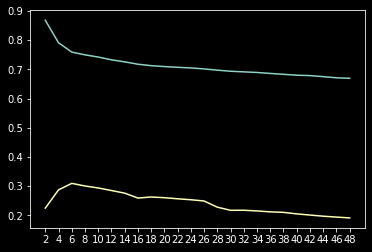

In [45]:
plt.style.use('dark_background')
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24), n);

In [47]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6), X, Y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

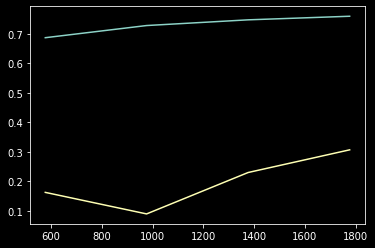

In [49]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])

El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

### Como solucionar el overfitting y el underfitting?

Viarianza Alta:

- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

Bias Alto:

- Más features
- Modelo más complejo

Mal resultado general

- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset